<a href="https://colab.research.google.com/github/ahlqui/VeloxChemColabs/blob/main/DihedralScan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>




# Scan a dihedral angle


This notebook requires that you have a molecular structure. Two options:

Define Molecule as XYZ-coordinates: Can be generatred with free software such as www.avogadro.cc

Define Molecule with SMILES code, A molecule can be defined using a SMILES code (example below). We have two suggested ways to generate smiles from structure. 1) Sketch your molecule at https://www.rcsb.org/chemical-sketch and the SMILES code will be shown right below the structure. 2) Build your molecule at https://molview.org/ , go to Tools/Information Card and it will show you the SMILES code. Just copy/paste it into the SMILES box below.

Example of xyz-coordinates for CO2:

O 0.00 0.00 0.00

C 0.00 0.00 1.20

O 0.00 0.00 2.40

Example of SMILES for CO2:

O=C=O

## Installation
Before you can run anything a few things need to be installed. It all runs on the Google Colab server an you do not need to install anything on your computer. Just run the two cells below by pressing the play button. It can take some minute per cell. The first cell will give a warning that can be ignored.

In [ ]:
#@title Install VeloxChem and dependencies (ca 2 min)
#@markdown Before you can run anything a few things need to be installed. It all runs on the Google Colab server an you do not need to install anything on your computer.
%%capture
! wget -qnc https://github.com/ahlqui/VeloxChemColabs/raw/refs/heads/main/install.py
! python install.py
import sys
python_version = f"{sys.version_info.major}.{sys.version_info.minor}"
sys.path.append(f'/usr/local/lib/python{python_version}/site-packages/')
import veloxchem as vlx


In [ ]:
xyz_coordinates = """
N     0.4785967928750  -0.4330741880750  -0.4934317502006
H     1.3794564278886   0.0429751463168  -0.5120458348956
C     0.4573285404340  -1.3154740355836  -1.6452845209868
H     1.2794157350200  -2.0270971721773  -1.5868316520123
H    -0.4697908768414  -1.8882598290096  -1.6558792536570
C     0.3747047426388  -1.2102491878280   0.7331072010194
H    -0.4082292852521  -1.9567463178277   0.6148319854093
H     1.2952953868059  -1.7540437197433   0.9183116804327
C     0.6956425554192   0.9059967227241  -5.3588904651214
C     1.6690431285267  -0.0704102447688  -5.0614336089256
C     1.5905279342425  -0.7922292640998  -3.8527793116028
C     0.5421211238334  -0.5430166236398  -2.9451176135833
C    -0.4312572408155   0.4285446612223  -3.2497814984180
C    -0.3564249048118   1.1570067527526  -4.4544417171718
H     0.7549521548685   1.4652126122086  -6.2812972715425
H     2.3338053657174  -1.5390048087124  -3.6163728176857
H    -1.2215586002930   0.6165771400284  -2.5371827271696
C    -0.5809783149118   1.1061887532548   4.2819306994214
C    -1.0539691464599  -0.2152180430193   4.1484967454886
C    -0.7402866542775  -0.9585904738513   2.9917812697427
C     0.0501603450518  -0.3918335577218   1.9715484114033
C     0.5329231859523   0.9234697295847   2.1220017776407
C     0.2096151223583   1.6793509886579   3.2655299818144
H    -0.8298576406810   1.6816374807225   5.1614537759970
H    -1.1155297675244  -1.9639771384900   2.8737258346041
H     1.1311551788061   1.3586475153088   1.3389498331805
C     2.7985412681099  -0.3440921389086  -6.0320361103160
H     3.0137177612643  -1.4119025048439  -6.0784904425001
H     2.5433990952730  -0.0090827377477  -7.0376742707821
H     3.7013243404231   0.1769923076871  -5.7132670703364
C    -1.3956677617432   2.2110713683443  -4.7713360805252
H    -2.2850215726603   2.0829577471538  -4.1532353918110
H    -0.9892606342753   3.2051959925139  -4.5854917335667
H    -1.6989550492144   2.1496453780473  -5.8166145479409
C    -1.9096053739985  -0.8269385079269   5.2372774019485
H    -1.8730938416183  -1.9157634078951   5.1986764605346
H    -1.5629099527925  -0.5125717843390   6.2218512212214
H    -2.9465170241487  -0.5126306418706   5.1188520156529
C     0.7055071531436   3.1039291474455   3.3878074482962
H     0.6996321098764   3.5926125742168   2.4126899821207
H     0.0720511304863   3.6841458846608   4.0587668370105
H     1.7245462284362   3.1151446899290   3.7742478882927
"""


In [ ]:
#@title Define your molecule, either asa SMILES code or xyz-coordinates above
#@markdown - Enter the SMILES code
smiles_code = 'OCCC=O' #@param {type:"string"}
#@markdown - If you want to use the xyz coordinates in the previous cell check box
use_xyz = False # @param {type:"boolean"}
if use_xyz == False:
  molecule = vlx.Molecule.read_smiles(smiles_code)
else:
  molecule = vlx.Molecule.read_str(xyz_coordinates)
print('Structure of the molecule entered: ')
molecule.show(atom_indices=True)
#@markdown - Give your Gromacs files a name
gromacs_file = 'test' #@param {type:"string"}
#@markdown - Give your molecule a residue name (three letters)
residue_name = 'tes' #@param {type:"string"}



Structure of the molecule entered: 


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

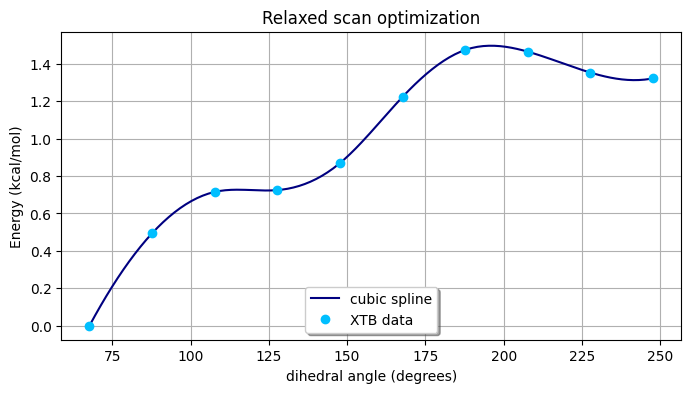

In [ ]:
#@title XTB dihedral scan
scf_drv = vlx.XtbDriver()
scf_drv.ostream.mute()
scan_dihedral = ( 2, 3, 4, 5) #@param {type:"raw"}
initial_dihedral = molecule.get_dihedral_in_degrees(scan_dihedral)
steps = 10 #@param {type:"integer"}
angles_scanned = 180 #@param {type:"integer"}
opt_drv = vlx.OptimizationDriver(scf_drv)
optimization_settings = {"coordsys": "tric"}
opt_drv.constraints = ["scan dihedral " + str(scan_dihedral[0]) + " " + str(scan_dihedral[1]) + " " + str(scan_dihedral[2]) + " " + str(scan_dihedral[3]) + " " + str(initial_dihedral) + " " + str(initial_dihedral + angles_scanned) + " " + str(steps)]
opt_drv.ostream.mute()
opt_results = opt_drv.compute(molecule)

import numpy as np
import scipy

occc = np.linspace(initial_dihedral, initial_dihedral+angles_scanned, steps)

e_min_in_au = min(opt_results["scan_energies"])

energy_scan = [
    (e - e_min_in_au) * vlx.hartree_in_kjpermol()
    for e in opt_results["scan_energies"]
]

spline_func = scipy.interpolate.interp1d(occc, energy_scan, kind="cubic")

x_spline = np.linspace(occc[0], occc[-1], 200)
y_spline = spline_func(x_spline)

from matplotlib import pyplot as plt

fig, ax = plt.subplots(figsize=(8, 4))

ax.plot(x_spline, y_spline, "-", color="navy", label="cubic spline")
ax.plot(occc, energy_scan, "o", color="deepskyblue", label="XTB data")

ax.legend(frameon=True, shadow=True, loc="lower center")

ax.grid(True)

ax.set_title("Relaxed scan optimization")
ax.set_xlabel("dihedral angle (degrees)")
ax.set_ylabel("Energy (kJ/mol)")

plt.show()

In [ ]:
#@title Generate a force field and write Gromacs files
#@markdown - Run this cell if you want to run MD or MM optimization.
#@markdown - Example timing: Ibuprofen (1 min)
ff_gen = vlx.MMForceFieldGenerator()
basis = vlx.MolecularBasis.read(molecule, 'sto-3g')
ff_gen.ostream.mute()
ff_gen.create_topology(molecule, basis)

ff_gen.write_gromacs_files(gromacs_file, residue_name)


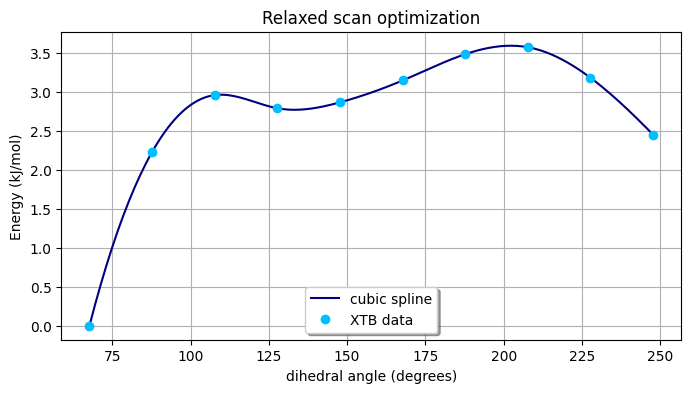

In [ ]:
#@title MM dihedral scan

scan_dihedral = ( 2, 3, 4, 5) #@param {type:"raw"}
initial_dihedral = molecule.get_dihedral_in_degrees(scan_dihedral)
steps = 10 #@param {type:"integer"}
angles_scanned = 180 #@param {type:"integer"}
vlxopenmm = vlx.OpenMMDriver()
opt_drv = vlx.OptimizationDriver(vlxopenmm)
vlxopenmm.add_topology(gromacs_file + '.top')
optimization_settings = {"coordsys": "tric"}
opt_drv.constraints = ["scan dihedral " + str(scan_dihedral[0]) + " " + str(scan_dihedral[1]) + " " + str(scan_dihedral[2]) + " " + str(scan_dihedral[3]) + " " + str(initial_dihedral) + " " + str(initial_dihedral + angles_scanned) + " " + str(steps)]
opt_drv.ostream.mute()
opt_results = opt_drv.compute(molecule)

import numpy as np
import scipy

occc = np.linspace(initial_dihedral, initial_dihedral+angles_scanned, steps)

e_min_in_au = min(opt_results["scan_energies"])

energy_scan = [
    (e - e_min_in_au) * vlx.hartree_in_kjpermol()
    for e in opt_results["scan_energies"]
]

spline_func = scipy.interpolate.interp1d(occc, energy_scan, kind="cubic")

x_spline = np.linspace(occc[0], occc[-1], 200)
y_spline = spline_func(x_spline)

from matplotlib import pyplot as plt

fig, ax = plt.subplots(figsize=(8, 4))

ax.plot(x_spline, y_spline, "-", color="navy", label="cubic spline")
ax.plot(occc, energy_scan, "o", color="deepskyblue", label="XTB data")

ax.legend(frameon=True, shadow=True, loc="lower center")

ax.grid(True)

ax.set_title("Relaxed scan optimization")
ax.set_xlabel("dihedral angle (degrees)")
ax.set_ylabel("Energy (kJ/mol)")

plt.show()